## Overfiting

In [12]:
from keras.datasets import imdb
import warnings

warnings.filterwarnings('ignore')

(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
print("Los 10 primeros tokens del comentario con índice 0 son: ")
print(train_data[0][:10])

Los 10 primeros tokens del comentario con índice 0 son: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [4]:
train_labels[0]

np.int64(1)

In [5]:
# Primero obtenemos un diccionario de índices de palabras de IMDB
word_index = imdb.get_word_index()

# Creamos un diccionario inverso donde intercambiamos claves y valores
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

# Decodificamos el texto uniendo las palabras con espacios
# Para cada índice i en los datos de entrenamiento, buscamos la palabra correspondiente 
# usando reverse_word_index.get(i - 3, '?')
# El -3 es un offset y '?' es el valor por defecto si no se encuentra la palabra
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
len(x_train)

25000

In [9]:
x_train[0].shape

(10000,)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [ ]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
training = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - acc: 0.7016 - loss: 0.5953 - val_acc: 0.8686 - val_loss: 0.3905
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.8943 - loss: 0.3386 - val_acc: 0.8855 - val_loss: 0.3127
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9249 - loss: 0.2435 - val_acc: 0.8921 - val_loss: 0.2811
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9370 - loss: 0.1949 - val_acc: 0.8788 - val_loss: 0.3023
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9508 - loss: 0.1583 - val_acc: 0.8761 - val_loss: 0.3037
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9579 - loss: 0.1346 - val_acc: 0.8891 - val_loss: 0.2832
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.9649 - loss: 0.1166 - val_acc: 0.8849 - val_loss: 0.2925
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9738 - loss: 0.0986 - val_acc: 0.8795 - val_loss: 0.3311
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.9792

In [17]:
history_dict = training.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

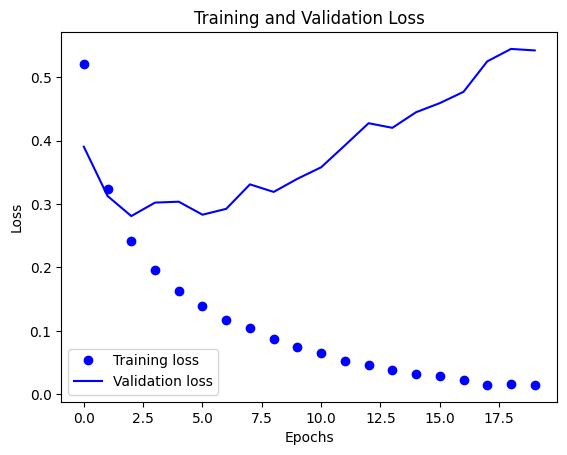

In [18]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#epochs = range(1, len(history_dict['acc']) +1)
epochs = training.epoch
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

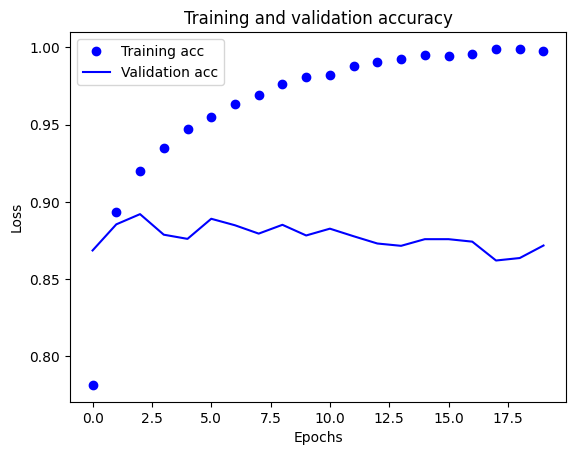

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

training=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=5,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - acc: 0.6768 - loss: 0.5983 - val_acc: 0.8600 - val_loss: 0.3803
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.8928 - loss: 0.3216 - val_acc: 0.8752 - val_loss: 0.3154
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.9271 - loss: 0.2286 - val_acc: 0.8887 - val_loss: 0.2813
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9454 - loss: 0.1744 - val_acc: 0.8845 - val_loss: 0.2819
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9575 - loss: 0.1450 - val_acc: 0.8863 - val_loss: 0.2852


In [21]:
prediction = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [22]:
prediction[0]

array([0.27422866], dtype=float32)

In [23]:
y_test[0]

np.float32(0.0)